In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('votes.csv')
df

year         round from_country_id to_country_id from_country  \
0      1957         final              at            nl           at   
1      1957         final              at            fr           at   
2      1957         final              at            dk           at   
3      1957         final              at            lu           at   
4      1957         final              at            de           at   
...     ...           ...             ...           ...          ...   
47002  2019  semi-final-2              gb            hr           gb   
47003  2019  semi-final-2              gb            lv           gb   
47004  2019  semi-final-2              gb            am           gb   
47005  2019  semi-final-2              gb            at           gb   
47006  2019  semi-final-2              gb            ie           gb   

      to_country  total_points  tele_points  jury_points  
0             nl             6          NaN          NaN  
1             fr             0          NaN          NaN  
2             dk             0          NaN          NaN  
3             lu             3          NaN          NaN  
4             de             0          NaN          NaN  
...          ...           ...          ...          ...  
47002         hr             8          0.0          8.0  
47003         lv             0          0.0          0.0  
47004         am             0          0.0          0.0  
47005         at             0          0.0          0.0  
47006         ie             3          3.0          0.0  

[47007 rows x 9 columns]

In [3]:
# Make it easier to understand by changing the country codes to country names
df['from_country'] = df['from_country'].replace({'at': 'Austria', 'be': 'Belgium', 'bg': 'Bulgaria', 'cy': 'Cyprus', 'cz': 'Czech Republic', 'de': 'Germany', 'dk': 'Denmark', 'ee': 'Estonia', 'gr': 'Greece', 'es': 'Spain', 'fi': 'Finland', 'fr': 'France', 'hr': 'Croatia', 'hu': 'Hungary', 'ie': 'Ireland', 'it': 'Italy', 'lt': 'Lithuania', 'lu': 'Luxembourg', 'lv': 'Latvia', 'mt': 'Malta', 'nl': 'Netherlands', 'pl': 'Poland', 'pt': 'Portugal', 'ro': 'Romania', 'se': 'Sweden', 'si': 'Slovenia', 'sk': 'Slovakia', 'gb': 'United Kingdom', 'ad': 'Andorra', 'al': 'Albania', 'am': 'Armenia', 'au': 'Australia', 'az': 'Azerbaijan', 'ba': 'Bosnia and Herzegovina', 'by': 'Belarus', 'ch': 'Switzerland', 'cs': 'Serbia', 'ge': 'Georgia', 'is': 'Iceland', 'li': 'Liechtenstein', 'ma': 'Marocco', 'mc': 'Monaco', 'mk': 'North Macedonia', 'md': 'Moldova', 'me': 'Montenegro', 'no': 'Norway', 'rs': 'Serbia', 'ru': 'Russia', 'sm': 'San Marino', 'tr': 'Türkiye', 'ua': 'Ukraine', 'yu': 'Yugoslavia', 'il': 'Israel'})

# And do the same for to_country
df['to_country'] = df['to_country'].replace({'at': 'Austria', 'be': 'Belgium', 'bg': 'Bulgaria', 'cy': 'Cyprus', 'cz': 'Czech Republic', 'de': 'Germany', 'dk': 'Denmark', 'ee': 'Estonia', 'gr': 'Greece', 'es': 'Spain', 'fi': 'Finland', 'fr': 'France', 'hr': 'Croatia', 'hu': 'Hungary', 'ie': 'Ireland', 'it': 'Italy', 'lt': 'Lithuania', 'lu': 'Luxembourg', 'lv': 'Latvia', 'mt': 'Malta', 'nl': 'Netherlands', 'pl': 'Poland', 'pt': 'Portugal', 'ro': 'Romania', 'se': 'Sweden', 'si': 'Slovenia', 'sk': 'Slovakia', 'gb': 'United Kingdom', 'ad': 'Andorra', 'al': 'Albania', 'am': 'Armenia', 'au': 'Australia', 'az': 'Azerbaijan', 'ba': 'Bosnia and Herzegovina', 'by': 'Belarus', 'ch': 'Switzerland', 'cs': 'Serbia', 'ge': 'Georgia', 'is': 'Iceland', 'li': 'Liechtenstein', 'ma': 'Marocco', 'mc': 'Monaco', 'mk': 'North Macedonia', 'md': 'Moldova', 'me': 'Montenegro', 'no': 'Norway', 'rs': 'Serbia', 'ru': 'Russia', 'sm': 'San Marino', 'tr': 'Türkiye', 'ua': 'Ukraine', 'yu': 'Yugoslavia', 'il': 'Israel'})


In [4]:
# Here I had chat-GPT write me some convenient code to create a boolean variable telling me if the two countries are neighbors

borders = {
    'Norway': ['Sweden', 'Finland', 'Russia', 'Norway'],
    'Cyprus': [],
    'Denmark': ['Germany', 'Sweden','Norway'],
    'Greece': ['Albania', 'North Macedonia', 'Bulgaria', 'Türkiye'],
    'United Kingdom': [],
    'Finland': ['Sweden', 'Norway', 'Russia'],
    'Spain': ['Portugal', 'France', 'Andorra'],
    'Ireland': [],
    'Sweden': ['Norway', 'Finland', 'Denmark'],
    'France': ['Belgium', 'Luxembourg', 'Germany', 'Switzerland', 'Italy', 'Spain', 'Andorra', 'Monaco'],
    'Iceland': [],
    'Portugal': ['Spain'],
    'Belgium': ['Netherlands', 'Germany', 'Luxembourg', 'France'],
    'Switzerland': ['Germany', 'Austria', 'Liechtenstein', 'Italy', 'France'],
    'Netherlands': ['Belgium', 'Germany'],
    'Austria': ['Germany', 'Czech Republic', 'Slovakia', 'Hungary', 'Slovenia', 'Italy', 'Switzerland', 'Liechtenstein'],
    'Germany': ['Denmark', 'Netherlands', 'Belgium', 'Luxembourg', 'France', 'Switzerland', 'Austria', 'Czech Republic', 'Poland'],
    'Moldova': ['Ukraine', 'Romania'],
    'Estonia': ['Russia', 'Latvia'],
    'Israel': ['Lebanon', 'Syria', 'Jordan', 'Palestine'],
    'Luxembourg': ['Belgium', 'Germany', 'France'],
    'Latvia': ['Estonia', 'Russia', 'Belarus', 'Lithuania'],
    'Croatia': ['Slovenia', 'Hungary', 'Serbia', 'Bosnia and Herzegovina', 'Montenegro'],
    'Belarus': ['Russia', 'Latvia', 'Lithuania', 'Poland', 'Ukraine'],
    'Slovenia': ['Italy', 'Austria', 'Hungary', 'Croatia'],
    'Romania': ['Ukraine', 'Moldova', 'Hungary', 'Serbia', 'Bulgaria'],
    'North Macedonia': ['Serbia', 'Kosovo', 'Albania', 'Greece', 'Bulgaria'],
    'Malta': [],
    'Türkiye': ['Greece', 'Bulgaria', 'Georgia', 'Armenia', 'Iran', 'Iraq', 'Syria'],
    'Albania': ['Montenegro', 'Kosovo', 'North Macedonia', 'Greece'],
    'Bosnia and Herzegovina': ['Croatia', 'Serbia', 'Montenegro'],
    'Italy': ['France', 'Switzerland', 'Austria', 'Slovenia', 'Vatican City', 'San Marino'],
    'Lithuania': ['Russia', 'Belarus', 'Latvia', 'Poland'],
    'Ukraine': ['Russia', 'Belarus', 'Poland', 'Slovakia', 'Hungary', 'Romania', 'Moldova'],
    'Serbia': ['Hungary', 'Romania', 'Bulgaria', 'North Macedonia', 'Kosovo', 'Bosnia and Herzegovina', 'Croatia','Montenegro'],
    'Armenia': ['Georgia', 'Azerbaijan', 'Iran', 'Türkiye'],
    'Poland': ['Germany', 'Czech Republic', 'Slovakia', 'Ukraine', 'Belarus', 'Lithuania'],
    'Russia': ['Norway', 'Finland', 'Estonia', 'Latvia', 'Belarus', 'Ukraine', 'Georgia', 'Azerbaijan', 'Kazakhstan', 'China', 'North Korea'],
    'Bulgaria': ['Romania', 'Serbia', 'North Macedonia', 'Greece', 'Türkiye'],
    'Yugoslavia': [],
    'Montenegro': ['Croatia', 'Bosnia and Herzegovina', 'Serbia', 'Albania'],
    'Georgia': ['Russia', 'Armenia', 'Azerbaijan', 'Türkiye'],
    'Azerbaijan': ['Russia', 'Georgia', 'Armenia', 'Iran'],
    'Monaco': ['France'],
    'Hungary': ['Austria', 'Slovakia', 'Ukraine', 'Romania', 'Serbia', 'Croatia', 'Slovenia'],
    'San Marino': ['Italy'],
    'Andorra': ['Spain', 'France'],
    'Czech Republic': ['Germany', 'Poland', 'Slovakia', 'Austria'],
    'Slovakia': ['Poland', 'Czech Republic', 'Austria', 'Hungary', 'Ukraine']}

In [5]:
# Create the neighbors dictionary
neighbors = {}
for key, value in borders.items():
    for neighbor in value:
        neighbors[frozenset([key, neighbor])] = True

# Add a new column to the DataFrame
df['neighboring'] = 0

# Iterate over the rows of the DataFrame
for i, row in df.iterrows():
    if row['to_country'] != '':
        if neighbors.get(frozenset([row['from_country'], row['to_country']])) or neighbors.get(frozenset([row['to_country'], row['from_country']])):
            df.at[i, 'neighboring'] = 1

# Print the resulting DataFrame
df.head(5)

year  round from_country_id to_country_id from_country   to_country  \
0  1957  final              at            nl      Austria  Netherlands   
1  1957  final              at            fr      Austria       France   
2  1957  final              at            dk      Austria      Denmark   
3  1957  final              at            lu      Austria   Luxembourg   
4  1957  final              at            de      Austria      Germany   

   total_points  tele_points  jury_points  neighboring  
0             6          NaN          NaN            0  
1             0          NaN          NaN            0  
2             0          NaN          NaN            0  
3             3          NaN          NaN            0  
4             0          NaN          NaN            1

And then get the region of the to_country and from_country. Here I use [EuroVoc's categorization](https://op.europa.eu/en/web/eu-vocabularies/concept-scheme/-/resource?uri=http://eurovoc.europa.eu/100277) maintained by the European Union. The regions are: Northern Europe, Western Europe, Southern Europe and Central and Eastern Europe. 

In [6]:
# Create the regions dictionary
eurovoc_regions = {
    'Northern Europe': ['Denmark', 'Estonia', 'Finland', 'Iceland', 'Latvia', 'Lithuania', 'Norway', 'Sweden'],
    'Western Europe': ['Andorra', 'Austria', 'Belgium', 'France', 'Germany', 'Ireland', 'Liechtenstein', 'Luxembourg', 'Monaco', 'Netherlands', 'Switzerland', 'United Kingdom'],
    'Southern Europe': ['Cyprus', 'Greece', 'Holy See', 'Italy', 'Malta', 'Portugal', 'San Marino', 'Spain', 'Türkiye'],
    'Central and Eastern Europe': ['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Czech Republic', 'Croatia', 'Georgia', 'Hungary', 'Kosovo', 'Moldova', 'Montenegro', 'North Macedonia', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovenia', 'Slovakia', 'Ukraine', 'Yugoslavia']
}

# Map each country to its region
df['from_country_region'] = df['from_country'].map({country: region for region, countries in eurovoc_regions.items() for country in countries})

# Map each country to its region
df['to_country_region'] = df['to_country'].map({country: region for region, countries in eurovoc_regions.items() for country in countries})

In [7]:
# Create a new column same_region which is 1 if from_country and to_country are the same region
df['same_region'] = (df['from_country_region'] == df['to_country_region']).astype(int)


In [8]:
df

year         round from_country_id to_country_id    from_country  \
0      1957         final              at            nl         Austria   
1      1957         final              at            fr         Austria   
2      1957         final              at            dk         Austria   
3      1957         final              at            lu         Austria   
4      1957         final              at            de         Austria   
...     ...           ...             ...           ...             ...   
47002  2019  semi-final-2              gb            hr  United Kingdom   
47003  2019  semi-final-2              gb            lv  United Kingdom   
47004  2019  semi-final-2              gb            am  United Kingdom   
47005  2019  semi-final-2              gb            at  United Kingdom   
47006  2019  semi-final-2              gb            ie  United Kingdom   

        to_country  total_points  tele_points  jury_points  neighboring  \
0      Netherlands             6          NaN          NaN            0   
1           France             0          NaN          NaN            0   
2          Denmark             0          NaN          NaN            0   
3       Luxembourg             3          NaN          NaN            0   
4          Germany             0          NaN          NaN            1   
...            ...           ...          ...          ...          ...   
47002      Croatia             8          0.0          8.0            0   
47003       Latvia             0          0.0          0.0            0   
47004      Armenia             0          0.0          0.0            0   
47005      Austria             0          0.0          0.0            0   
47006      Ireland             3          3.0          0.0            0   

      from_country_region           to_country_region  same_region  
0          Western Europe              Western Europe            1  
1          Western Europe              Western Europe            1  
2          Western Europe             Northern Europe            0  
3          Western Europe              Western Europe            1  
4          Western Europe              Western Europe            1  
...                   ...                         ...          ...  
47002      Western Europe  Central and Eastern Europe            0  
47003      Western Europe             Northern Europe            0  
47004      Western Europe  Central and Eastern Europe            0  
47005      Western Europe              Western Europe            1  
47006      Western Europe              Western Europe            1  

[47007 rows x 13 columns]

#### Standardizing the votes
Throughout the years, the voting system of the Eurovision has changed. To make the votes comparable over time, I standardize all the votes to follow the voting system currently in place. Today the votes are given on a scale from 1-8 and then 10 and 12 - 12 being the highest. 

|Year|Voting system|
|:-|:-|
|1956-1961|10-1|
|1962|3-1|
|1963|5-1|
|1964-1966|5,3,1/6,3/9|
|1967-1970|10-1|
|1971-1973|10-2|
|1974|10-1|
|1975-2015|12, 10 8-1|
|2016-2022|12, 10, 8-1 $x$ 2|


Source: [Wikipedia](https://en.wikipedia.org/wiki/Voting_at_the_Eurovision_Song_Contest)

In [9]:
# Because of the messiness of the data before 1967, we will only look at the data from 1967 onwards
df = df[df['year'] >= 1967]

# I can't really standardize the missing 1 value in 1971-1973 but because of the low value, I include those years in the analysis and accept that it might be a bit off

# If the year is lower than 1975 and the total_points is 10 then change it to 12
df.loc[(df['year'] < 1975) & (df['total_points'] == 10), 'total_points'] = 12

# And if the year is lower than 1975 and the value is 9 then change it to 12
df.loc[(df['year'] < 1975) & (df['total_points'] == 9), 'total_points'] = 12

# If the year is lower than 2016 multiply the total_points by 2
df.loc[(df['year'] < 2016), 'total_points'] = df['total_points'] * 2

This standardization is not completely accurate but it will provide a better picture of the strenght between countries over time.

In [10]:
df.head(5)

year  round from_country_id to_country_id from_country      to_country  \
2162  1967  final              at            gb      Austria  United Kingdom   
2163  1967  final              at            ie      Austria         Ireland   
2164  1967  final              at            fr      Austria          France   
2165  1967  final              at            lu      Austria      Luxembourg   
2166  1967  final              at            mc      Austria          Monaco   

      total_points  tele_points  jury_points  neighboring from_country_region  \
2162             6          NaN          NaN            0      Western Europe   
2163             6          NaN          NaN            0      Western Europe   
2164             2          NaN          NaN            0      Western Europe   
2165             0          NaN          NaN            0      Western Europe   
2166             4          NaN          NaN            0      Western Europe   

     to_country_region  same_region  
2162    Western Europe            1  
2163    Western Europe            1  
2164    Western Europe            1  
2165    Western Europe            1  
2166    Western Europe            1

In [11]:
# Get the number of years a country has participated by counting the number of unique years for each from_country
df['years_participated'] = df.groupby('from_country')['year'].transform('nunique')

/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_51797/52788624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years_participated'] = df.groupby('from_country')['year'].transform('nunique')


## Methodological choices
- Only looking at total points scored, not points from jury or public
- Drop rows where `to_country` is equal to `from_country` since countries can't vote for themselves.

In [12]:
df = df[df['from_country'] != df['to_country']]
df

year         round from_country_id to_country_id    from_country  \
2162   1967         final              at            gb         Austria   
2163   1967         final              at            ie         Austria   
2164   1967         final              at            fr         Austria   
2165   1967         final              at            lu         Austria   
2166   1967         final              at            mc         Austria   
...     ...           ...             ...           ...             ...   
47002  2019  semi-final-2              gb            hr  United Kingdom   
47003  2019  semi-final-2              gb            lv  United Kingdom   
47004  2019  semi-final-2              gb            am  United Kingdom   
47005  2019  semi-final-2              gb            at  United Kingdom   
47006  2019  semi-final-2              gb            ie  United Kingdom   

           to_country  total_points  tele_points  jury_points  neighboring  \
2162   United Kingdom             6          NaN          NaN            0   
2163          Ireland             6          NaN          NaN            0   
2164           France             2          NaN          NaN            0   
2165       Luxembourg             0          NaN          NaN            0   
2166           Monaco             4          NaN          NaN            0   
...               ...           ...          ...          ...          ...   
47002         Croatia             8          0.0          8.0            0   
47003          Latvia             0          0.0          0.0            0   
47004         Armenia             0          0.0          0.0            0   
47005         Austria             0          0.0          0.0            0   
47006         Ireland             3          3.0          0.0            0   

      from_country_region           to_country_region  same_region  \
2162       Western Europe              Western Europe            1   
2163       Western Europe              Western Europe            1   
2164       Western Europe              Western Europe            1   
2165       Western Europe              Western Europe            1   
2166       Western Europe              Western Europe            1   
...                   ...                         ...          ...   
47002      Western Europe  Central and Eastern Europe            0   
47003      Western Europe             Northern Europe            0   
47004      Western Europe  Central and Eastern Europe            0   
47005      Western Europe              Western Europe            1   
47006      Western Europe              Western Europe            1   

       years_participated  
2162                   42  
2163                   42  
2164                   42  
2165                   42  
2166                   42  
...                   ...  
47002                  53  
47003                  53  
47004                  53  
47005                  53  
47006                  53  

[43159 rows x 14 columns]

In [13]:
# Some countries have only participated a few times. E.g in the example of Morocco (only particpated once) it looks like they have a strong connection to Türkiye (Turkey) but that is because they only participated once and Türkiye (Turkey) was the only country they voted for. So we will only look at countries that have participated more than 5 times
df = df[df['years_participated'] > 5]

In [14]:
# group by from country and to country and aggregate total_points and order by total_points and don't show the index and keep the neighbors column
df1 = df.groupby(['from_country', 'to_country', 'neighboring','same_region']).agg({'total_points': 'sum'}).reset_index().sort_values(by=['total_points'], ascending=False)

df1.to_csv('to_from_votes.csv', index=False)

In [15]:
# group df by to country, from country and year and get the average votes for that year and keep the year participated column
df2 = df.groupby(['to_country', 'from_country', 'year', 'neighboring','same_region']).agg({'total_points': 'mean', 'years_participated': 'first'}).reset_index()
df2

to_country    from_country  year  neighboring  same_region  \
0         Albania         Andorra  2004            0            0   
1         Albania         Andorra  2005            0            0   
2         Albania         Andorra  2006            0            0   
3         Albania         Andorra  2007            0            0   
4         Albania         Andorra  2008            0            0   
...           ...             ...   ...          ...          ...   
36786  Yugoslavia  United Kingdom  1988            0            0   
36787  Yugoslavia  United Kingdom  1989            0            0   
36788  Yugoslavia  United Kingdom  1990            0            0   
36789  Yugoslavia  United Kingdom  1991            0            0   
36790  Yugoslavia  United Kingdom  1992            0            0   

       total_points  years_participated  
0               6.0                   6  
1               0.0                   6  
2               0.0                   6  
3               0.0                   6  
4               0.0                   6  
...             ...                 ...  
36786          16.0                  53  
36787          24.0                  53  
36788          10.0                  53  
36789           0.0                  53  
36790           0.0                  53  

[36791 rows x 7 columns]

In [16]:
# group by from country and to country and aggregate total_points divided by years participated and order by total_points and dont show the index

data = df2.groupby(['from_country', 'to_country', 'neighboring','same_region']).agg({'total_points': 'sum', 'years_participated': 'first'}).reset_index().sort_values(by=['total_points'], ascending=False)
data

# create a new column called points_per_year and divide total_points by years_participated
data['average_points_per_year'] = data['total_points'] / data['years_participated']
data.sort_values(by=['average_points_per_year'], ascending=False).head(50)

from_country              to_country  neighboring  \
1359                 Moldova                 Romania            1   
85                   Andorra                   Spain            1   
491                   Cyprus                  Greece            0   
269                  Belarus                  Russia            1   
79                   Andorra                Portugal            0   
127                  Armenia                  Russia            0   
611                  Denmark                  Sweden            1   
18                   Albania                  Greece            1   
1450              Montenegro                  Serbia            1   
1360                 Moldova                  Russia            0   
1168                  Latvia                 Estonia            1   
1190                  Latvia                  Russia            1   
396                 Bulgaria                  Greece            1   
2213                 Ukraine                  Russia            1   
1873                  Serbia         North Macedonia            1   
769                  Georgia              Azerbaijan            1   
1413              Montenegro                 Albania            1   
871                   Greece                  Cyprus            0   
231               Azerbaijan                 Ukraine            0   
766                  Georgia                 Armenia            1   
278                  Belarus                 Ukraine            1   
1508         North Macedonia                 Albania            1   
1730                 Romania                 Moldova            1   
339   Bosnia and Herzegovina                 Croatia            1   
1599                  Norway                  Sweden            1   
1912                Slovakia                   Malta            0   
1369                 Moldova                 Ukraine            1   
527           Czech Republic              Azerbaijan            0   
31                   Albania         North Macedonia            1   
970                  Iceland                 Denmark            0   
653                  Estonia                  Russia            1   
109                  Armenia                  Greece            0   
808                  Georgia                 Ukraine            0   
222               Azerbaijan                  Russia            1   
659                  Estonia                  Sweden            0   
1000                 Iceland                  Sweden            0   
433                  Croatia  Bosnia and Herzegovina            1   
1820              San Marino                   Italy            1   
2182                 Ukraine                 Belarus            1   
524           Czech Republic                 Armenia            0   
1939                Slovenia                 Croatia            1   
1273              Luxembourg          United Kingdom            0   
1546         North Macedonia                  Serbia            1   
1721                 Romania                  Greece            0   
107                  Armenia                 Georgia            1   
1237               Lithuania                  Russia            1   
1851                  Serbia                 Croatia            1   
23                   Albania                   Italy            0   
89                   Andorra                 Ukraine            0   
409                 Bulgaria         North Macedonia            1   

      same_region  total_points  years_participated  average_points_per_year  
1359            1         327.0                  15                21.800000  
85              0         120.0                   6                20.000000  
491             1         683.0                  36                18.972222  
269             1         297.0                  16                18.562500  
79              0         110.0                   6                18.333333  
127             1     

In [17]:
# copy the dataframe to the clipboard
df1.to_clipboard(index=False)

In [18]:
df1.head(10)

from_country to_country  neighboring  same_region  total_points
491           Cyprus     Greece            0            1           803
1599          Norway     Sweden            1            1           801
611          Denmark     Sweden            1            1           759
871           Greece     Cyprus            0            1           723
2245  United Kingdom    Ireland            0            1           614
708          Finland     Sweden            1            1           542
2040          Sweden    Denmark            1            1           530
2062          Sweden     Norway            1            1           525
1568          Norway    Denmark            1            1           511
2268  United Kingdom     Sweden            0            0           509

In [19]:
# group df by to_country and aggregate total_points and order by total_points
df2 = df.groupby(['to_country']).agg({'total_points': 'sum'}).reset_index().sort_values(by=['total_points'], ascending=False)
df2.to_csv('country_agg_votes.csv', index=False)

In [20]:
df2.head()

to_country  total_points
45     Sweden         12212
35     Norway          8673
39     Russia          8452
19     Greece          8349
22    Ireland          8098

### Scandinavian countries vote for each other

In [21]:
# keep rows in df where to_country and from_country are both either dk, no, se, is, or fi
df3 = df[(df['to_country'].isin(['dk', 'no', 'se', 'is', 'fi'])) & (df['from_country'].isin(['dk', 'no', 'se', 'is', 'fi']))]

# drop the columns tele_points, jury_points, to_country_id, from_country_id since I won't use them
df3 = df3.drop(columns=['tele_points', 'jury_points', 'to_country_id', 'from_country_id'])
df3.tail(50)

Empty DataFrame
Columns: [year, round, from_country, to_country, total_points, neighboring, from_country_region, to_country_region, same_region, years_participated]
Index: []

In [22]:
# Group by from_country and to_country and aggregate total_points and order by total_points
df4 = df3.groupby(['from_country', 'to_country']).agg({'total_points': 'sum'}).reset_index().sort_values(by=['total_points'], ascending=False)

df4.to_clipboard(index=False)

In [23]:
# create a dataframe dk only containing the rows where from_country is dk
dk = df3[df3['from_country'] == 'dk']

# and group it by year and to_country and aggregate total_points and order by total_points
dk = dk.groupby(['year', 'to_country']).agg({'total_points': 'sum'}).reset_index().sort_values(by=['total_points'], ascending=False)

dk.to_clipboard(index=False)

In [24]:
# create a dataframe dk only containing the rows where from_country is no
no = df3[df3['from_country'] == 'no']

# and group it by year and to_country and aggregate total_points and order by total_points
no = no.groupby(['year', 'to_country']).agg({'total_points': 'sum'}).reset_index().sort_values(by=['total_points'], ascending=False)

no.to_clipboard(index=False)

In [25]:
# create a dataframe dk only containing the rows where from_country is se
se = df3[df3['from_country'] == 'se']

# and group it by year and to_country and aggregate total_points and order by total_points
se = se.groupby(['year', 'to_country']).agg({'total_points': 'sum'}).reset_index().sort_values(by=['total_points'], ascending=False)

se.to_clipboard(index=False)

In [26]:
# create a dataframe dk only containing the rows where from_country is dk
fi = df3[df3['from_country'] == 'fi']

# and group it by year and to_country and aggregate total_points and order by total_points
fi = fi.groupby(['year', 'to_country']).agg({'total_points': 'sum'}).reset_index().sort_values(by=['total_points'], ascending=False)

fi.to_clipboard(index=False)

In [27]:
# create a dataframe dk only containing the rows where from_country is is
isl = df3[df3['from_country'] == 'is']

# and group it by year and to_country and aggregate total_points and order by total_points
isl = isl.groupby(['year', 'to_country']).agg({'total_points': 'sum'}).reset_index().sort_values(by=['total_points'], ascending=False)

isl.to_clipboard(index=False)

## Exploratory data visualization

In [28]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [29]:
%%R

require('tidyverse')
library('flextable')
library('GGally')
library('ggraph')
library('gutenbergr')
library('igraph')
library('Matrix')
library('network')
library('quanteda')
library('sna')
library('tidygraph')
library('tidyverse')
library('tm')
library('tibble')
# activate klippy for copy-to-clipboard button
klippy::klippy()

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R[write to console]: 
Attaching package: ‘flextable’


R[write to console]: The following object is masked from ‘package:purrr’:

    compose


R[write to console]: Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following object is masked from ‘package:flextable’:

    compose


R[write to console]: The following objects are masked from ‘package:lubridate’:

    %--%, union


R[write to console]: The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


R[write to console]: The following objects are masked from ‘package:purrr’:

    compose, simplify


R[write to console]: The following object is masked from ‘package:tidyr’:

    crossing


R[write to console]: The following object is masked from ‘package:tibble’:

    as_data_frame


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write 

<script>
  addClassKlippyTo("pre.r, pre.markdown");
  addKlippy('left', 'top', 'auto', '1', 'Copy code', 'Copied!');
</script>


In [30]:
%%R 

ed <- read.csv('agg_votes.csv')
va <- read.csv('country_agg_votes.csv')

In [31]:
%%R

ig <- igraph::graph_from_data_frame(d=ed, vertices=va, directed = FALSE)

R[write to console]: Error in igraph::graph_from_data_frame(d = ed, vertices = va, directed = FALSE) : 
  Some vertex names in edge list are not listed in vertex data frame




Error in igraph::graph_from_data_frame(d = ed, vertices = va, directed = FALSE) : 
  Some vertex names in edge list are not listed in vertex data frame


RInterpreterError: Failed to parse and evaluate line '\nig <- igraph::graph_from_data_frame(d=ed, vertices=va, directed = FALSE)\n'.
R error message: 'Error in igraph::graph_from_data_frame(d = ed, vertices = va, directed = FALSE) : \n  Some vertex names in edge list are not listed in vertex data frame'

In [ ]:
%%R

tg <- tidygraph::as_tbl_graph(ig) %>% 
  tidygraph::activate(nodes) %>% 
  dplyr::mutate(label=name)

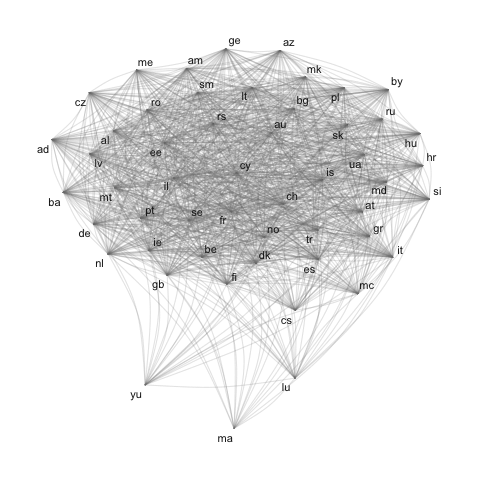

In [ ]:
%%R 

# set seed
set.seed(12345)
# edge size shows frequency of co-occurrence
tg %>%
   ggraph(layout = "fr") +
   geom_edge_arc(colour= "gray50",
                 lineend = "round",
                 strength = .1,
                 alpha = .1) +
   geom_node_text(aes(label = name), 
                  repel = TRUE, 
                  point.padding = unit(0.2, "lines"), 
                  colour="gray10") +
  theme_graph(background = "white") +
  guides(edge_width = FALSE,
         edge_alpha = FALSE)

In [ ]:
%%R

v.size <- V(tg)$total_points
# inspect
v.size

 [1] 12352  8737  8501  8380  8117  7664  7571  7428  7221  6764  6464  6415
[13]  6192  5914  5847  5572  5409  5374  5264  5066  5054  5010  4963  4932
[25]  4907  4443  4331  4272  4065  4053  4041  3820  3365  3257  3137  3104
[37]  2901  2796  2793  2710  2672  2422  2291  1966  1452  1326  1283   926
[49]   688   314   288    14


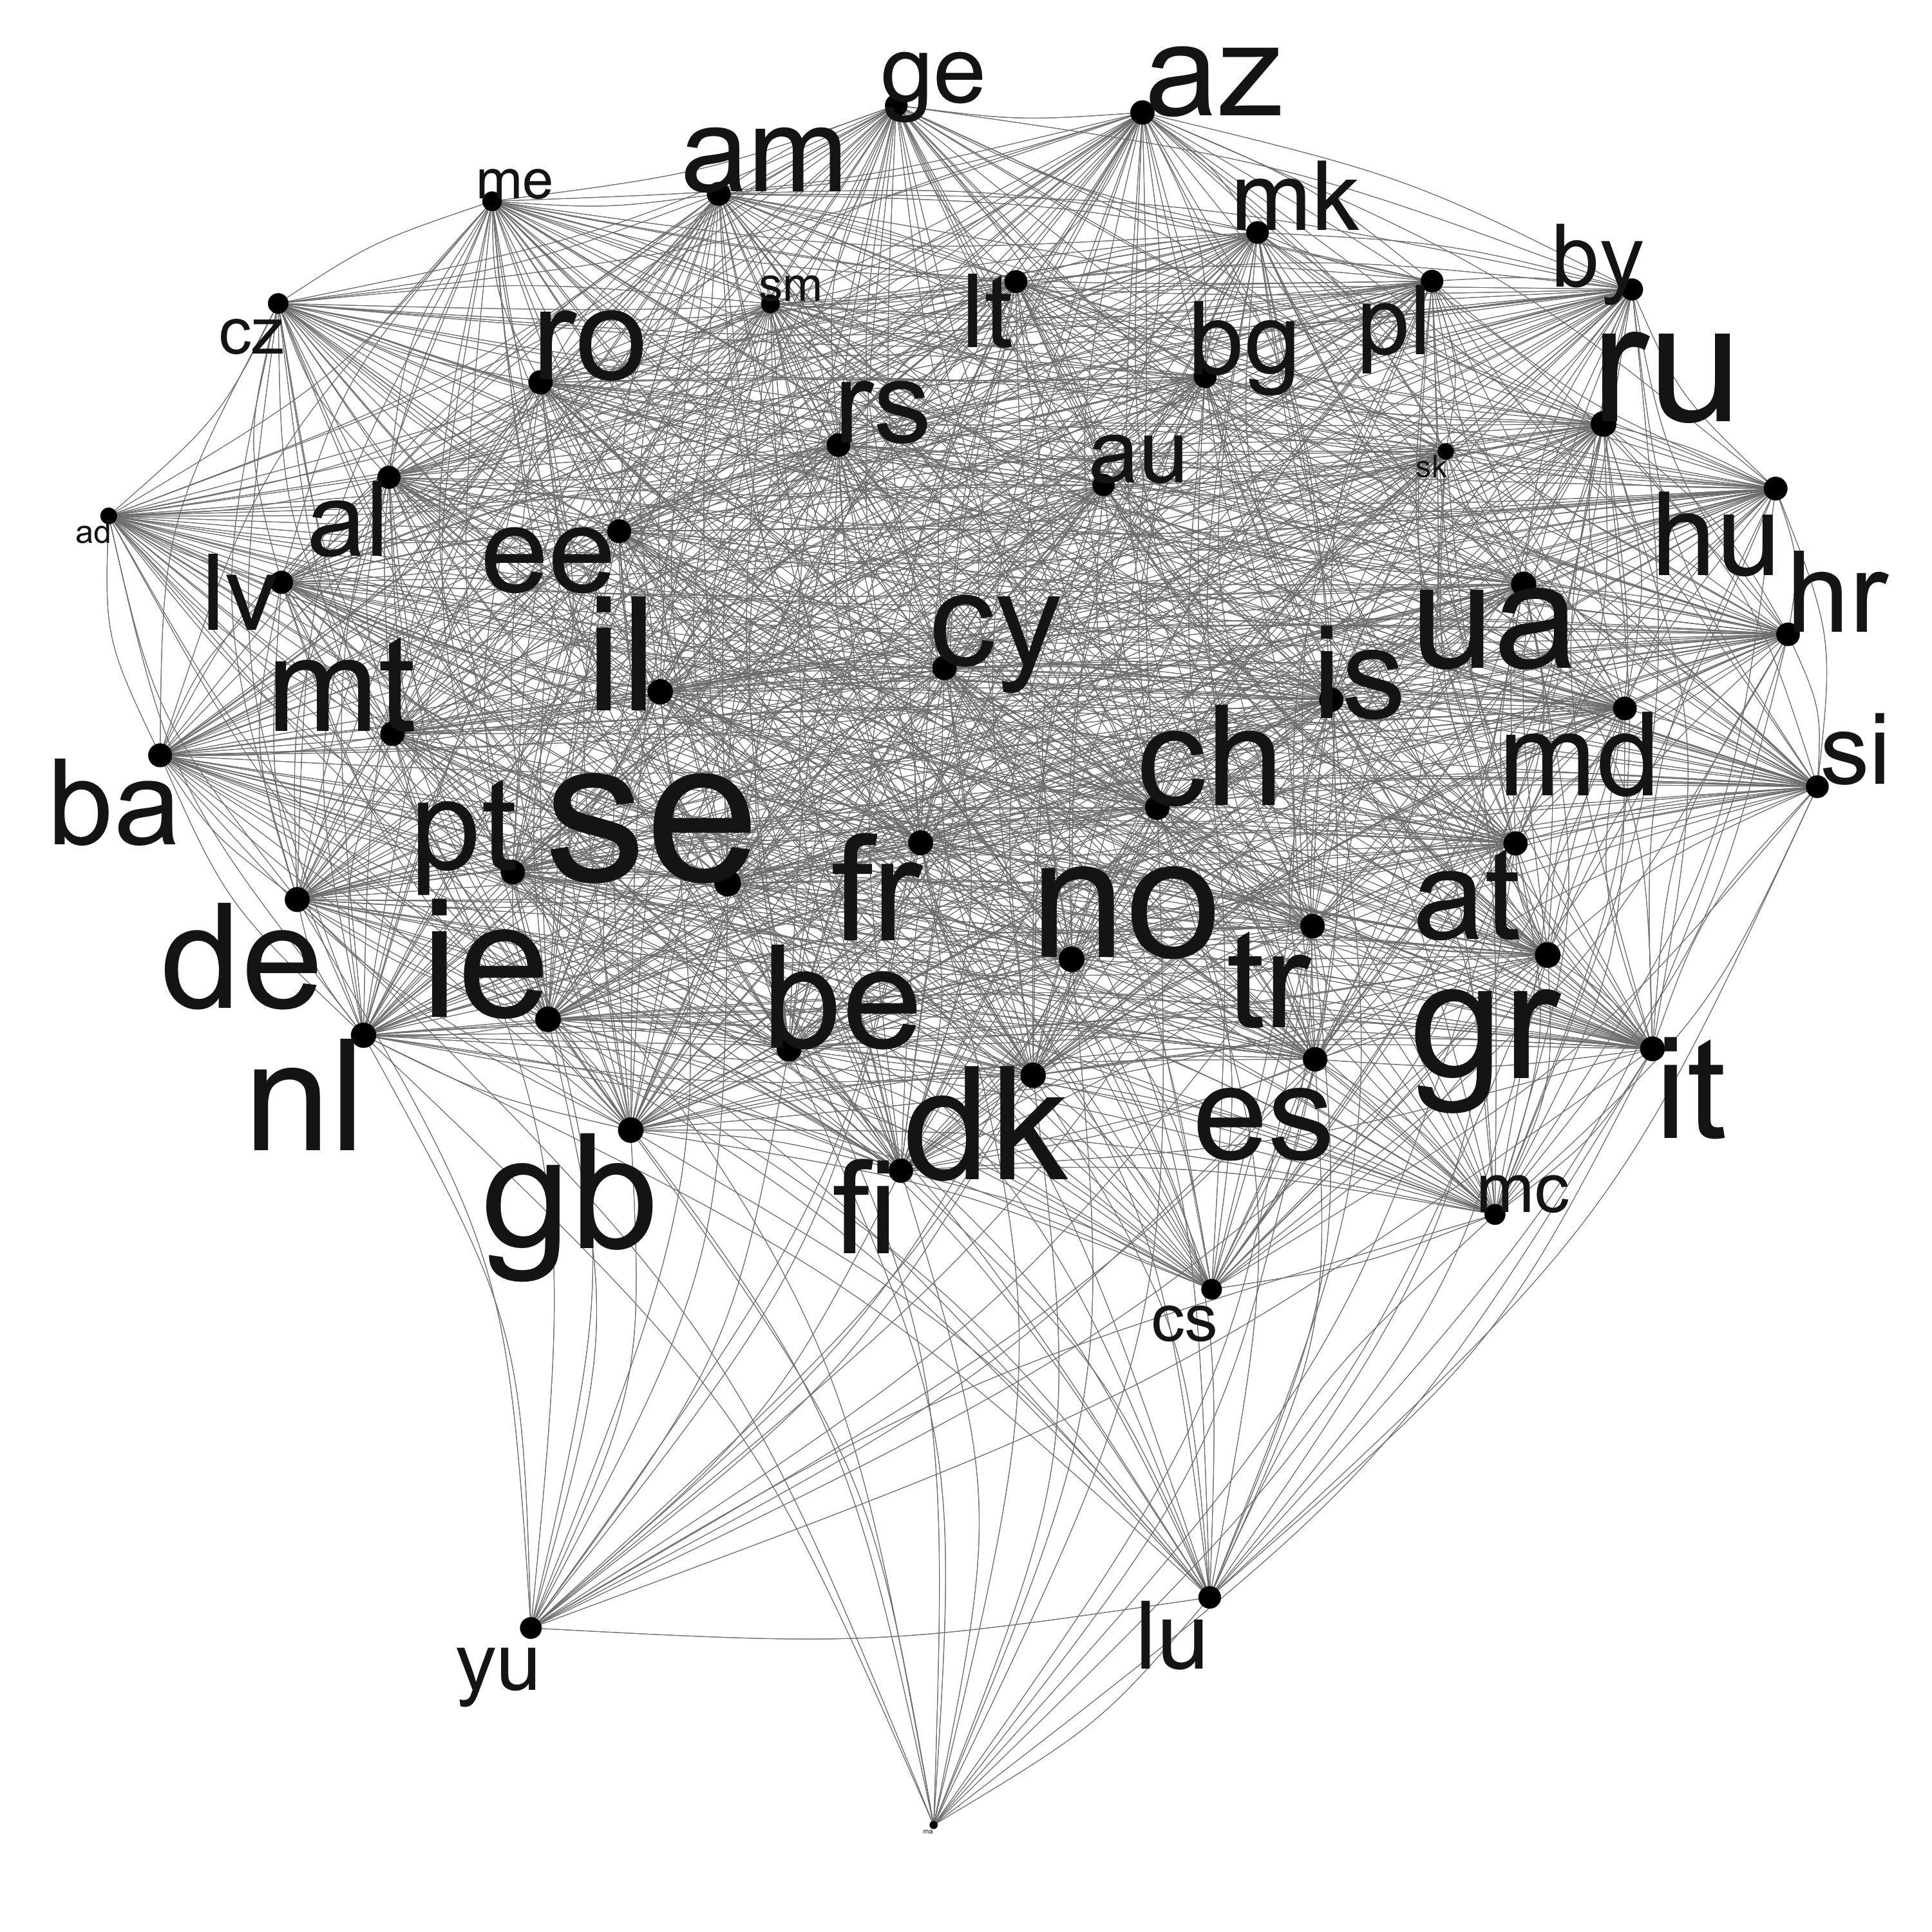

In [ ]:
%%R -h 3000 -w 3000

# set seed
set.seed(12345)
# edge size shows frequency of co-occurrence
tg %>%
   ggraph(layout = "fr") +
   geom_edge_arc(colour= "gray50",
                  lineend = "round",
                 strength = .1) +
   geom_node_point(size=log(v.size)*2) +
   geom_node_text(aes(label = name), 
                  repel = TRUE, 
                  point.padding = unit(0.2, "lines"), 
                  size=sqrt(v.size), 
                  colour="gray10") +
  scale_edge_width(range = c(0, 2.5)) +
  scale_edge_alpha(range = c(0, .3)) +
  theme_graph(background = "white") +
  guides(edge_width = FALSE,
         edge_alpha = FALSE)

In [ ]:
%%R

E(tg)$weight <- E(tg)$total_points
# inspect weights
head(E(tg)$weight, 10)

 [1] 467 453 449 448 325 322 307 307 301 288


In [ ]:
%%R -h 3000 -w 3000

# set seed
set.seed(12345)
# edge size shows frequency of co-occurrence
tg %>%
   ggraph(layout = "fr") +
   geom_edge_arc(colour= "gray50",
                  lineend = "round",
                 strength = .1,
                 aes(edge_width = weight,
                     alpha = weight)) +
   geom_node_point(size=log(v.size)*2) +
   geom_node_text(aes(label = name), 
                  repel = TRUE, 
                  point.padding = unit(0.2, "lines"), 
                  size=sqrt(v.size), 
                  colour="gray10") +
  scale_edge_width(range = c(0, 2.5)) +
  scale_edge_alpha(range = c(0, .3)) +
  theme_graph(background = "white") +
  theme(legend.position = "top") +
  guides(edge_width = FALSE,
         edge_alpha = FALSE)

R[write to console]: Error in alg_fun(graph) : 
  At core/layout/fruchterman_reingold.c:401 : Weights must be positive for Fruchterman-Reingold layout. Invalid value




Error in alg_fun(graph) : 
  At core/layout/fruchterman_reingold.c:401 : Weights must be positive for Fruchterman-Reingold layout. Invalid value


RInterpreterError: Failed to parse and evaluate line '\n# set seed\nset.seed(12345)\n# edge size shows frequency of co-occurrence\ntg %>%\n   ggraph(layout = "fr") +\n   geom_edge_arc(colour= "gray50",\n                  lineend = "round",\n                 strength = .1,\n                 aes(edge_width = weight,\n                     alpha = weight)) +\n   geom_node_point(size=log(v.size)*2) +\n   geom_node_text(aes(label = name), \n                  repel = TRUE, \n                  point.padding = unit(0.2, "lines"), \n                  size=sqrt(v.size), \n                  colour="gray10") +\n  scale_edge_width(range = c(0, 2.5)) +\n  scale_edge_alpha(range = c(0, .3)) +\n  theme_graph(background = "white") +\n  theme(legend.position = "top") +\n  guides(edge_width = FALSE,\n         edge_alpha = FALSE)\n'.
R error message: 'Error in alg_fun(graph) : \n  At core/layout/fruchterman_reingold.c:401 : Weights must be positive for Fruchterman-Reingold layout. Invalid value'